In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from wordcloud import WordCloud
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pylab import mpl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('data/cs-training.csv')
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 查看各字段名

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

# 有12列数据，将ID列设置为索引列

In [14]:
len(df.columns)

12

In [15]:
df=df.set_index('ID',drop=True)   #设置id列为索引列
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 将各英文字段转为中文字段名方便理解

In [16]:
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
df.rename(columns=states,inplace=True)
df.head()    #修改英文字段名为中文字段名

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 坏客户是1，好客户对应0，

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   好坏客户        150000 non-null  int64  
 1   可用额度比值      150000 non-null  float64
 2   年龄          150000 non-null  int64  
 3   逾期30-59天笔数  150000 non-null  int64  
 4   负债率         150000 non-null  float64
 5   月收入         120269 non-null  float64
 6   信贷数量        150000 non-null  int64  
 7   逾期90天笔数     150000 non-null  int64  
 8   固定资产贷款量     150000 non-null  int64  
 9   逾期60-89天笔数  150000 non-null  int64  
 10  家属数量        146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


# 月收入和家属数量存在缺失

In [18]:
print("月收入缺失比:{:.2%}".format(df['月收入'].isnull().sum()/df.shape[0]))

月收入缺失比:19.82%


In [19]:
print("家属数量缺失比:{:.2%}".format(df['家属数量'].isnull().sum()/df.shape[0]))

家属数量缺失比:2.62%


In [20]:
df=df.fillna({'月收入':df['月收入'].mean()})
df1=df.dropna()
df1.shape

(146076, 11)

# 异常值处理

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

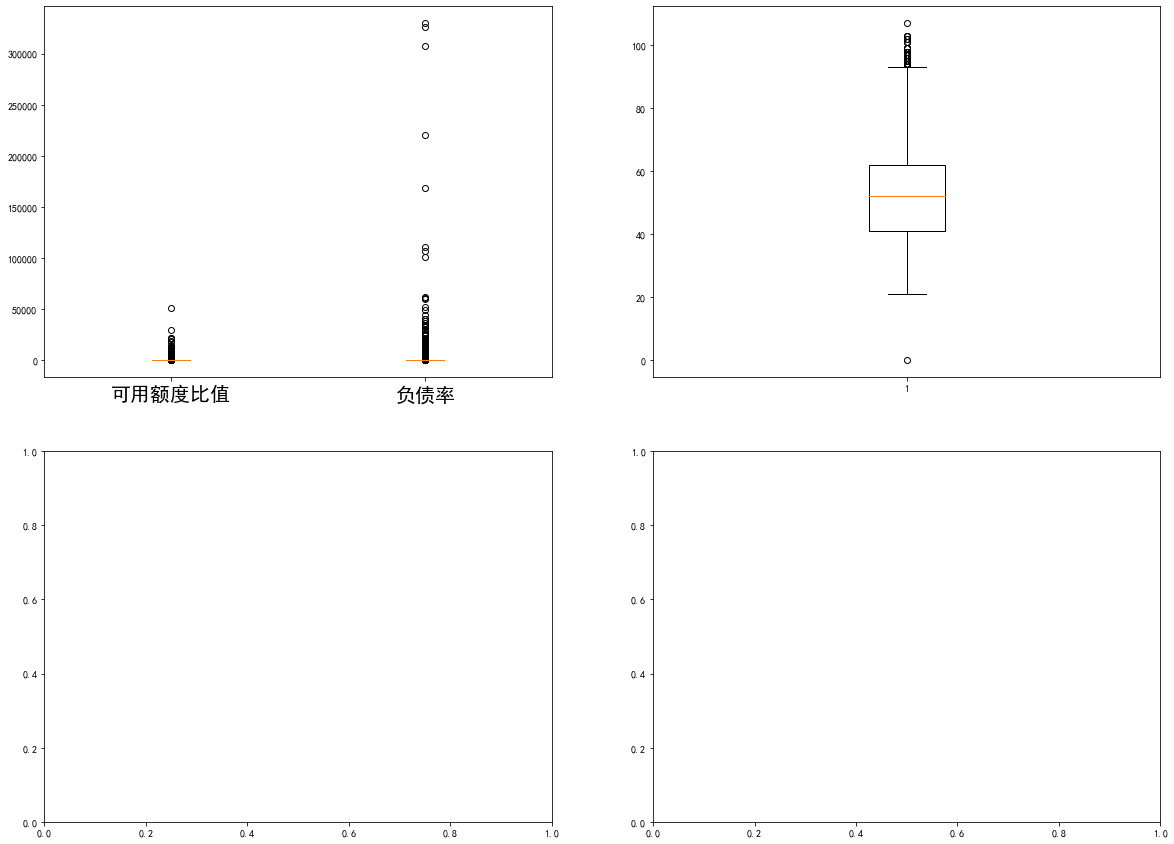

In [22]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
x1=df['可用额度比值']
x2=df['负债率']
x3=df1["年龄"]
x4=df1["逾期30-59天笔数"]
x5=df1["逾期60-89天笔数"]
x6=df1["逾期90天笔数"]
x7=df1["信贷数量"]
x8=df1["固定资产贷款量"]
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
ax1.boxplot([x1,x2])
ax1.set_xticklabels(["可用额度比值","负债率"], fontsize=20)
ax2.boxplot(x3)
ax2.set_xticklabels("年龄", fontsize=20)
ax3.boxplot([x4,x5,x6])
ax3.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"], fontsize=20)
ax4.boxplot([x7,x8])
ax4.set_xticklabels(["信贷数量","固定资产贷款量"], fontsize=20)

In [25]:
df1=df1[df1['可用额度比值']<1]
df1=df1[df1['年龄']>0]
df1=df1[df1['逾期30-59天笔数']<80]
df1=df1[df1['逾期60-89天笔数']<80]
df1=df1[df1['逾期90天笔数']<80]
df1=df1[df1['固定资产贷款量']<50]
df1.shape

(142559, 11)

# 探索分析

In [26]:
age_cut=pd.cut(df1['年龄'],5)
age_cut_group=df1['好坏客户'].groupby(age_cut).count()
age_cut_group

年龄
(20.914, 38.2]    26984
(38.2, 55.4]      56660
(55.4, 72.6]      45709
(72.6, 89.8]      12640
(89.8, 107.0]       566
Name: 好坏客户, dtype: int64

# 求各组的坏客户数

In [27]:
age_cut_grouped1=df1["好坏客户"].groupby(age_cut).sum()
age_cut_grouped1

年龄
(20.914, 38.2]    2478
(38.2, 55.4]      4067
(55.4, 72.6]      1664
(72.6, 89.8]       273
(89.8, 107.0]       12
Name: 好坏客户, dtype: int64

# 联结

In [28]:
df2=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)
df2.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
df2

,总客户数,坏客户数
年龄,,
"(20.914, 38.2]",26984,2478
"(38.2, 55.4]",56660,4067
"(55.4, 72.6]",45709,1664
"(72.6, 89.8]",12640,273
"(89.8, 107.0]",566,12


# 加一列好客户数

In [29]:
df2.insert(2,"好客户数",df2["总客户数"]-df2["坏客户数"])
df2

,总客户数,坏客户数,好客户数
年龄,,,
"(20.914, 38.2]",26984,2478,24506
"(38.2, 55.4]",56660,4067,52593
"(55.4, 72.6]",45709,1664,44045
"(72.6, 89.8]",12640,273,12367
"(89.8, 107.0]",566,12,554


# 再加一列坏客户占比

In [30]:
df2.insert(2,"坏客户占比",df2["坏客户数"]/df2["总客户数"])
df2

,总客户数,坏客户数,坏客户占比,好客户数
年龄,,,,
"(20.914, 38.2]",26984,2478,0.091832,24506
"(38.2, 55.4]",56660,4067,0.071779,52593
"(55.4, 72.6]",45709,1664,0.036404,44045
"(72.6, 89.8]",12640,273,0.021598,12367
"(89.8, 107.0]",566,12,0.021201,554


Text(0.5, 1.0, '年龄与好坏客户数分布图')

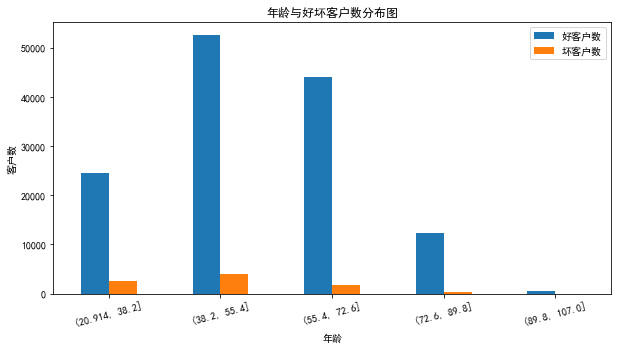

In [31]:
ax1=df2[["好客户数","坏客户数"]].plot.bar(figsize=(10,5))
ax1.set_xticklabels(df2.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")

Text(0.5, 1.0, '坏客户率随年龄的变化趋势图')

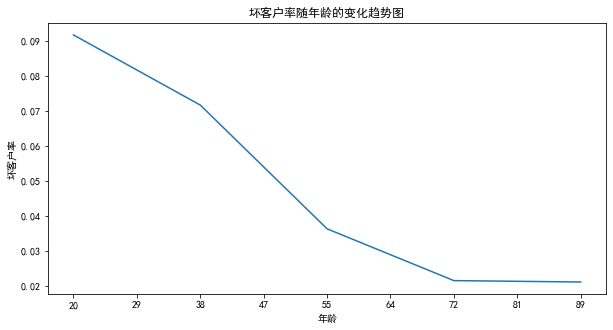

In [74]:
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")

# 多变量分析

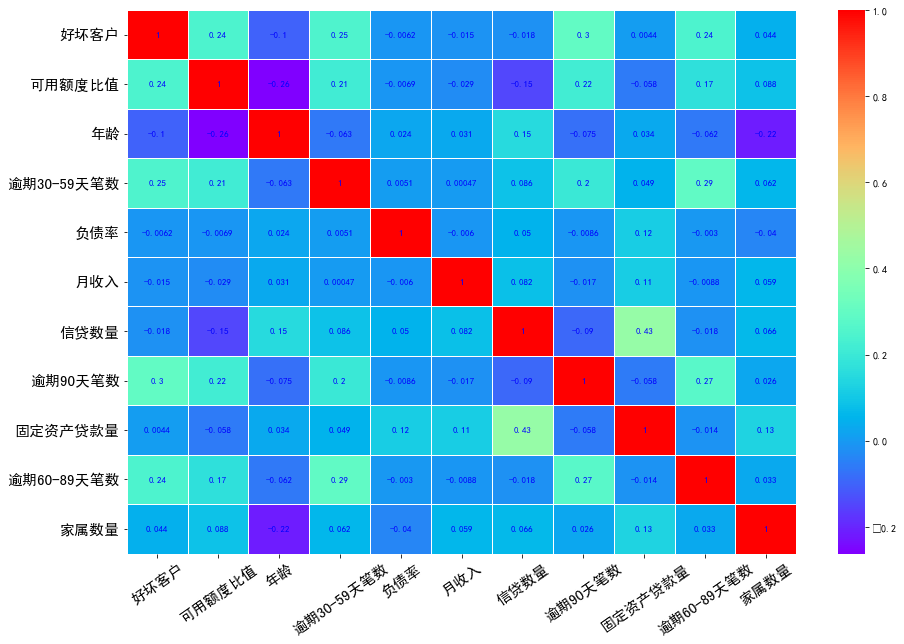

In [75]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'./SimHei.ttf',size=14)

#sns.set(font=myfont.get_name())

#plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
#plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小

corr = df1.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15,fontproperties=myfont)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15,fontproperties=myfont)
plt.show()

# 可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除。

# 四、特征选择


In [36]:
cut1=pd.qcut(df1["可用额度比值"],4,labels=False)
cut2=pd.qcut(df1["年龄"],8,labels=False)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cut4=pd.qcut(df1["负债率"],3,labels=False)
cut5=pd.qcut(df1["月收入"],4,labels=False)
cut6=pd.qcut(df1["信贷数量"],4,labels=False)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df1["逾期90天笔数"],bins7,labels=False)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df1["固定资产贷款量"],bins8,labels=False)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df1["逾期60-89天笔数"],bins9,labels=False)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(df1["家属数量"],bins10,labels=False)

# WOE值计算

In [37]:
rate=df1["好坏客户"].sum()/(df1["好坏客户"].count()-df1["好坏客户"].sum())
def get_woe_data(cut):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe
cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)
cut6_woe=get_woe_data(cut6)
cut7_woe=get_woe_data(cut7)
cut8_woe=get_woe_data(cut8)
cut9_woe=get_woe_data(cut9)
cut10_woe=get_woe_data(cut10)

# 随便挑几个变量看下woe

<AxesSubplot:xlabel='可用额度比值'>

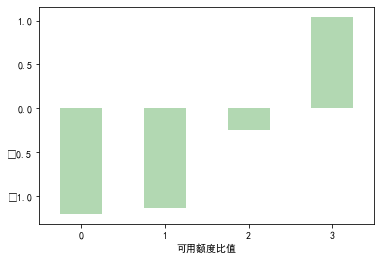

In [38]:
#可用额度比值
cut1_woe.plot.bar(color='g',alpha=0.3,rot=0)

<AxesSubplot:xlabel='年龄'>

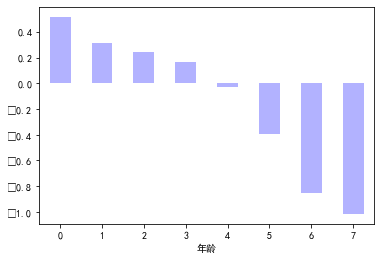

In [39]:
#年龄
cut2_woe.plot.bar(color='b',alpha=0.3,rot=0)

<AxesSubplot:xlabel='逾期30-59天笔数'>

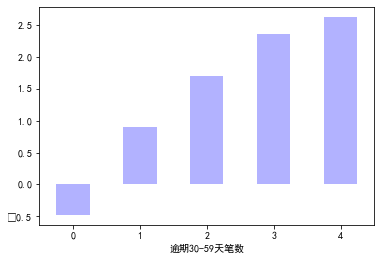

In [40]:
#逾期30-59天笔数
cut3_woe.plot.bar(color='b',alpha=0.3,rot=0)

# 可以看出woe已调整到具有单调性

# IV值计算

Text(0, 0.5, 'IV')

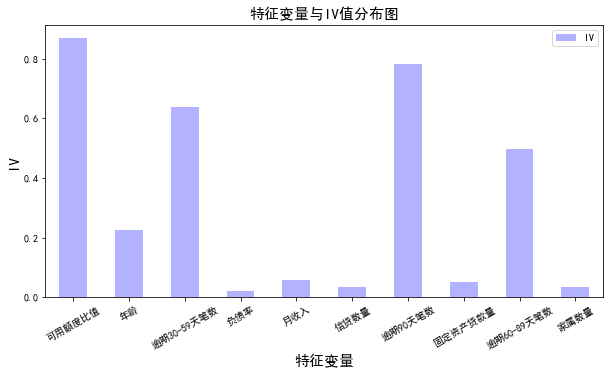

In [41]:
def get_IV_data(cut,cut_woe):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df1["好坏客户"].sum()-grouped.unstack().iloc[:,0]/(df1["好坏客户"].count()-df1["好坏客户"].sum()))*cut_woe).sum()    
    return cut_IV
#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)
cut6_IV=get_IV_data(cut6,cut6_woe)
cut7_IV=get_IV_data(cut7,cut7_woe)
cut8_IV=get_IV_data(cut8,cut8_woe)
cut9_IV=get_IV_data(cut9,cut9_woe)
cut10_IV=get_IV_data(cut10,cut10_woe)
IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量','逾期60-89天笔数','家属数量'],columns=['IV'])
iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))
iv.set_title('特征变量与IV值分布图',fontsize=(15),fontproperties=myfont)
iv.set_xlabel('特征变量',fontsize=(15),fontproperties=myfont)
iv.set_ylabel('IV',fontsize=(15),fontproperties=myfont)


In [42]:
IV

,IV
可用额度比值,0.867677
年龄,0.226285
逾期30-59天笔数,0.638915
负债率,0.021881
月收入,0.056417
信贷数量,0.035331
逾期90天笔数,0.780782
固定资产贷款量,0.052406
逾期60-89天笔数,0.497545
家属数量,0.033580


# 一般选取IV大于0.02的特征变量进行后续训练，从以上可以看出所有变量均满足，所以选取全部的

# WOE值替换

In [43]:
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
    return cut
df_new["好坏客户"]=df1["好坏客户"]
df_new["可用额度比值"]=replace_data(cut1,cut1_woe)
df_new["年龄"]=replace_data(cut2,cut2_woe)
df_new["逾期30-59天笔数"]=replace_data(cut3,cut3_woe)
df_new["负债率"]=replace_data(cut4,cut4_woe)
df_new["月收入"]=replace_data(cut5,cut5_woe)
df_new["信贷数量"]=replace_data(cut6,cut6_woe)
df_new["逾期90天笔数"]=replace_data(cut7,cut7_woe)
df_new["固定资产贷款量"]=replace_data(cut8,cut8_woe)
df_new["逾期60-89天笔数"]=replace_data(cut9,cut9_woe)
df_new["家属数量"]=replace_data(cut10,cut10_woe)
df_new.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,1.044468,0.246969,1.701683,0.191066,-0.321369,0.045474,-0.345338,0.665870,-0.244603,0.197472
2,0,1.044468,0.316890,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,0.097683
3,0,1.044468,0.316890,0.899640,-0.151014,0.289489,0.222781,1.990279,0.197418,-0.244603,-0.150675
4,0,-0.247395,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
5,0,1.044468,0.166515,0.899640,-0.151014,-0.321369,-0.255957,-0.345338,-0.235787,-0.244603,-0.150675


# 模型训练

![title](img\lr.png)

In [44]:
x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩：{}'.format(clf.score(x_test,y_test)))

测试成绩：0.9418841189674523


In [45]:
y_pred = model.predict_proba(x_test)
predictions = y_pred[:,1]
auc = metrics.roc_auc_score(y_test,predictions)
fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
ks = max(tpr - fpr)
print("KS:%.4f%%"%(ks))
print("AUC:%.4f%%"%(auc * 100.0))

KS:0.5274%
AUC:83.9908%


In [46]:
#求特征权值系数coe，后面训练结果转分值时会用到：
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到

In [47]:
coe

array([[0.62019761, 0.43160547, 0.56449512, 1.25787618, 0.57195395,
        0.21789471, 0.59067794, 0.63781761, 0.46569727, 0.37101125]])

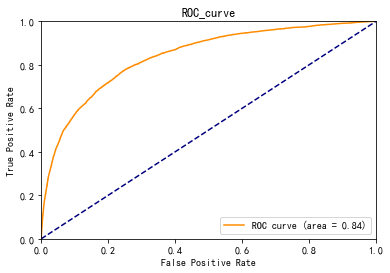

In [48]:
#roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

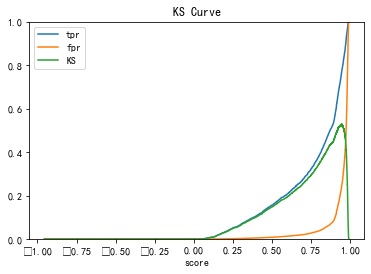

<Figure size 1440x1440 with 0 Axes>

In [49]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

# 模型结果转评分

![title](img/score.png)

![title](img/factor.png)

## 假设好坏比为20的时候分数为600分，每高20分好坏比翻一倍
## 现在我们求每个变量不同woe值对应的分数刻度可得：

In [55]:
factor = 20 / np.log(2)
offset = 600 - 20 * np.log(20) / np.log(2)
def get_score(coe,woe,factor):
    scores=[]
    interval = []
    for key,w in woe.items():
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)
x6 = get_score(coe[0][5], cut6_woe, factor)
x7 = get_score(coe[0][6], cut7_woe, factor)
x8 = get_score(coe[0][7], cut8_woe, factor)
x9 = get_score(coe[0][8], cut9_woe, factor)
x10 = get_score(coe[0][9], cut10_woe, factor)
print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("信贷数量对应的分数:{}".format(x6))
print("逾期90天笔数对应的分数:{}".format(x7))
print("固定资产贷款量对应的分数:{}".format(x8))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))

可用额度比值对应的分数:[-22.0, -20.0, -4.0, 19.0]
年龄对应的分数:[6.0, 4.0, 3.0, 2.0, -0.0, -5.0, -11.0, -13.0]
逾期30-59天笔数对应的分数:[-8.0, 15.0, 28.0, 38.0, 43.0]
负债率对应的分数:[-5.0, -2.0, 7.0]
月收入对应的分数:[5.0, 2.0, -3.0, -5.0]
信贷数量对应的分数:[1.0, -2.0, -1.0, 0.0]
逾期90天笔数对应的分数:[-6.0, 34.0, 47.0, 56.0, 56.0]
固定资产贷款量对应的分数:[4.0, -4.0, -3.0, 1.0, 12.0]
逾期60-89天笔数对应的分数:[-3.0, 25.0, 36.0, 40.0]
家属数量对应的分数:[-2.0, 1.0, 2.0, 3.0, 4.0, 7.0]


# 计算用户总分
## 1.取自动分箱的边界分割点

In [56]:
cu1=pd.qcut(df1["可用额度比值"],4,labels=False,retbins=True)
bins1=cu1[1]
cu2=pd.qcut(df1["年龄"],8,labels=False,retbins=True)
bins2=cu2[1]

# bins3=[-1,0,1,3,5,13]
# cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cu4=pd.qcut(df1["负债率"],3,labels=False,retbins=True)
bins4=cu4[1]
cu5=pd.qcut(df1["月收入"],4,labels=False,retbins=True)
bins5=cu5[1]
cu6=pd.qcut(df1["信贷数量"],4,labels=False,retbins=True)
bins6=cu6[1]

## 2.各变量对应的分数求和，算出每个用户的总分

In [57]:
def compute_score(series,bins,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(bins) - 2
        m = len(bins) - 2
        while j >= 0:
            if value >= bins[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [58]:
def calScore(test1):
    test1['x1'] = pd.Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], bins1, x1))
    test1['x2'] = pd.Series(compute_score(test1['age'], bins2, x2))
    test1['x3'] = pd.Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], bins3, x3))
    test1['x4'] = pd.Series(compute_score(test1['DebtRatio'], bins4, x4))
    test1['x5'] = pd.Series(compute_score(test1['MonthlyIncome'], bins5, x5))
    test1['x6'] = pd.Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], bins6, x6))
    test1['x7'] = pd.Series(compute_score(test1['NumberOfTimes90DaysLate'], bins7, x7))
    test1['x8'] = pd.Series(compute_score(test1['NumberRealEstateLoansOrLines'], bins8, x8))
    test1['x9'] = pd.Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], bins9, x9))
    test1['x10'] = pd.Series(compute_score(test1['NumberOfDependents'], bins10, x10))
    score = test1['x1']+test1['x2']+test1['x3']+test1['x4']+test1['x5']+test1['x6']+test1['x7']+test1['x8']+test1['x9']+test1['x10']+600
    return score[0]

In [59]:
def creditLevel(score):
    if score < 600.0:
        return -1
    elif score >= 600.0 and score < 640.0:
        return 2000
    elif score >= 640.0 and score < 680.0:
        return 4000
    elif score >= 680.0 and score < 720.0:
        return 6000
    elif score >= 720.0 and score < 760.0:
        return 8000
    elif score >= 760.0:
        return 10000

In [71]:
#进行全流程验证函数
def main(ID_Card,tel):
    #print('开始进入准入规则:')
    #result = rule.check(ID_Card,tel)
    #print(result)
    #if result != '通过准入规则检查':
        #return -1
    #else:
        print("开始反欺诈检验!")
        df = pd.read_csv('data/anti-fraud.txt',sep = '\t')
        if int(ID_Card) in df['ID'].tolist():
            data = df[df['ID'] == int(ID_Card)]
            if len(data.index.tolist()) > 0:
                data.drop('ID',inplace=True,axis=1)
                # 加载模型
                model = joblib.load("score_card/anti-fraud-rf.model")
                pred = model.predict(data.values)
                if pred[0] == 0:
                    print('您的信息已经通过反欺诈检验。')
                else:
                    print('您的信息存在异常，命中欺诈库，请完善信息，重新申请。')
                    return -1
            else:
                print("您的信息不全，请重新填写。")
                return -1
        else:
            print("您的信息不全，请重新填写。")
            return -1
        print("开始进行申请评分!")
        df = pd.read_csv('data/score-card.txt',sep = '\t')
        if int(ID_Card) in df['ID'].tolist():
            data = df[df['ID'] == int(ID_Card)]
            if len(data.index.tolist()) > 0:
                score = calScore(data)
                amt = creditLevel(score)
                if amt == -1:
                    print('抱歉，您没有通过申请，请完善更多资料重新进行申请。')
                    return -1
                else:
                    print('恭喜您，获得'+str(amt)+'额度，快去体现使用吧！')      
            else:
                print("您的信息不全，请重新填写。")
                return -1
        else:
            print("您的信息不全，请重新填写。")
            return -1

In [72]:
#实际验证
inputData = input("请输入身份证号，手机号:")
data = inputData.strip().split(',')
if len(data) == 2:
    ret = main(data[0],data[1])
    if ret == -1:
        print("真是遗憾！")
    else:
        print("进行后续步骤！")

请输入身份证号，手机号:130120198506302014,12345678954
开始反欺诈检验!
您的信息已经通过反欺诈检验。
开始进行申请评分!
恭喜您，获得4000额度，快去体现使用吧！
进行后续步骤！
